## CE9010: Introduction to Data Analysis
## Semester 2 2018/19
## Xavier Bresson
<hr>

## Tutorial 5: Supervised classification - improving capacity learning
## Objectives
### $\bullet$ Code linear and higher-order logistic regression models
### $\bullet$ Explore results
<hr>

In [13]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1.1 Load dataset #1
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

No handles with labels found to put in legend.


Number of training data= 1000
[[ 0.83159 -0.33906  0.     ]
 [ 0.87196  0.24418  0.     ]
 [ 1.01934  0.23241  0.     ]
 [ 1.09207  0.39539  0.     ]
 [ 1.2249   0.20577  0.     ]
 [ 0.73857  0.2535   0.     ]
 [ 1.31868  0.14831  0.     ]
 [ 0.97316  0.27317  0.     ]
 [ 0.98258  0.42117  0.     ]
 [ 0.62744  0.31469  0.     ]]
(1000, 3)
float64


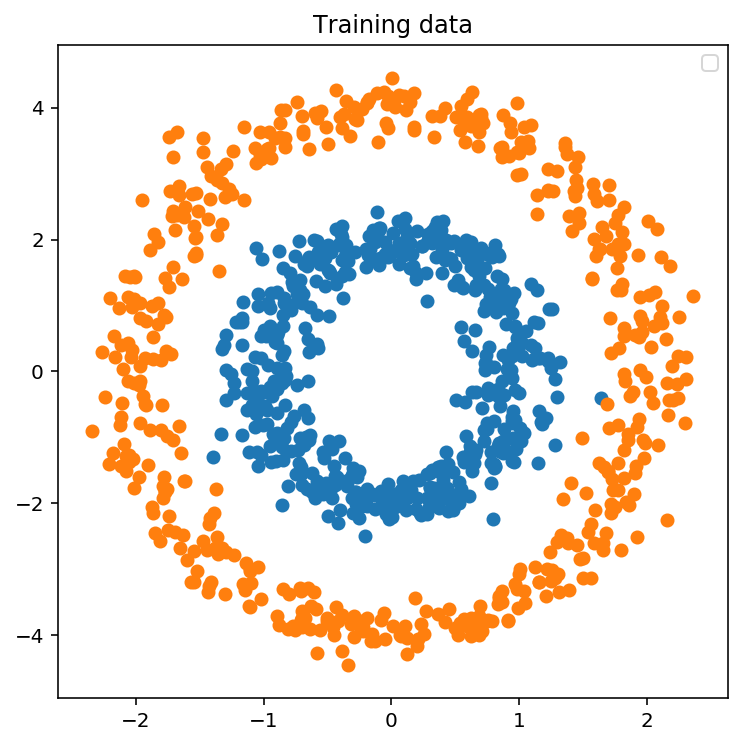

In [14]:
# import data with numpy
data = np.loadtxt('two_circles.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0],x2[idx_class0])
plt.scatter(x1[idx_class1],x2[idx_class1])
plt.title('Training data')
plt.legend()
plt.show()

## 1.2 Linear logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **linear** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.693. <br>

Time= 0.4557812213897705
0.6931457280381651
[[ 2.81334325e-06]
 [-1.63392470e-03]
 [-3.11998724e-04]]


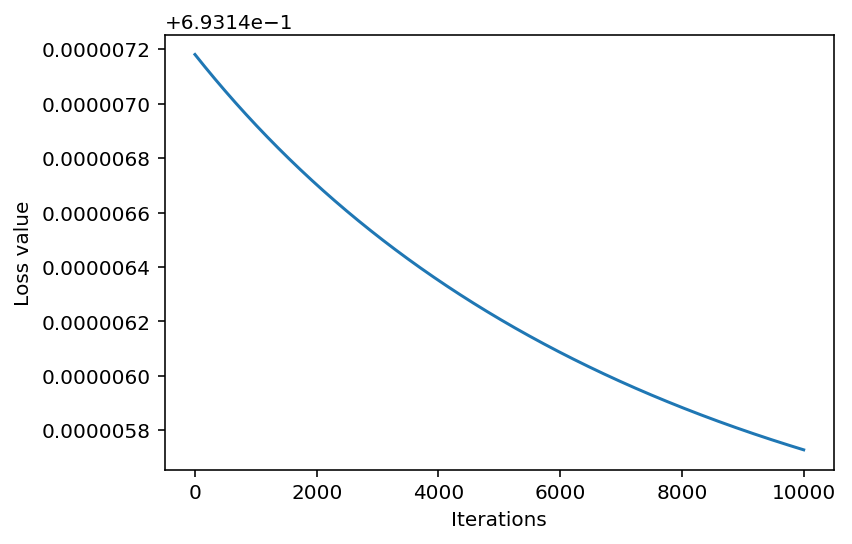

In [19]:
def sigmoid(z):
    sigmoid_f =  1/(1+np.exp(-z))
    return sigmoid_f 


# predictive function definition
def f_pred(X,w): 
    p =  sigmoid(np.dot(X,w))
    return p

def loss_logreg(y_pred,y): 
    n = len(y)
    loss = -(1/n)*(np.dot(y.T,np.log(y_pred))+np.dot((1-y).T,np.log(1-y_pred)))
    return loss

# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad =  (2/n)*np.dot(X.T,(y_pred-y))
    return grad

# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred =  f_pred(X,w)
        grad_f =  grad_loss(y_pred,y,X)
        w =  w - tau*grad_f
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters


#construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
y = data[:,2][:,None] # label 

# run gradient descent algorithm
start = time.time()
# w_init = np.array([-10,0.1,-0.2])[:,None]
w_init = np.array([0,0,0])[:,None]
tau = 1e-4; max_iter = 10000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)

# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


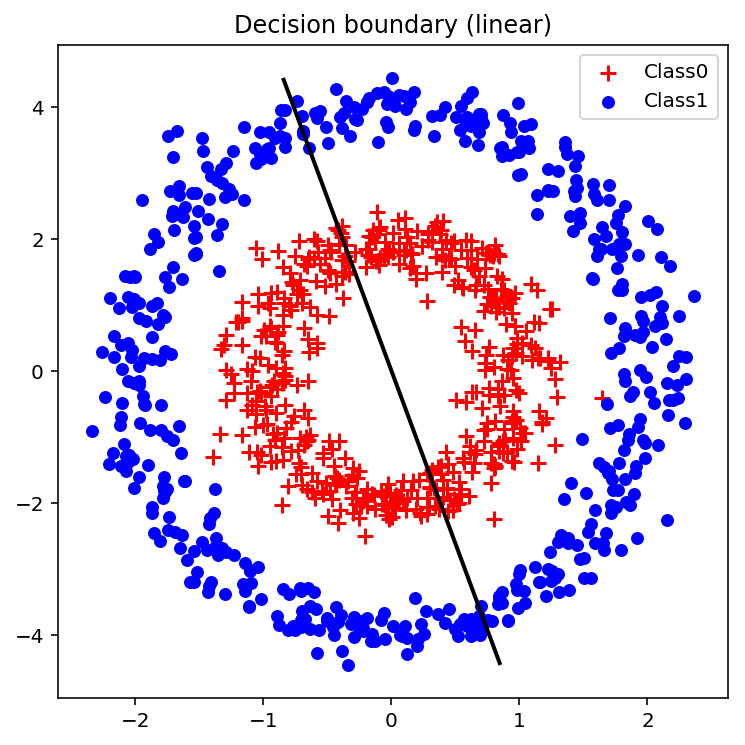

In [20]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


In [21]:
print(p)

[[0.5013034  0.50126423 0.50122505 ... 0.49946204 0.49942286 0.49938368]
 [0.50128925 0.50125007 0.50121089 ... 0.49944788 0.49940871 0.49936953]
 [0.50127509 0.50123591 0.50119674 ... 0.49943373 0.49939455 0.49935537]
 ...
 [0.5006381  0.50059892 0.50055975 ... 0.49879674 0.49875756 0.49871838]
 [0.50062395 0.50058477 0.50054559 ... 0.49878258 0.4987434  0.49870423]
 [0.50060979 0.50057061 0.50053144 ... 0.49876843 0.49872925 0.49869007]]


## 1.3 Quadratic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **quadratic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)}\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)}
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5
\end{array} 
\right]
\quad
$$

Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.011. <br>

[[ 1.          0.83159    -0.33906     0.69154193  0.11496168 -0.28195891]
 [ 1.          0.87196     0.24418     0.76031424  0.05962387  0.21291519]
 [ 1.          1.01934     0.23241     1.03905404  0.05401441  0.23690481]
 ...
 [ 1.          2.01992    -0.31388     4.08007681  0.09852065 -0.63401249]
 [ 1.          2.30028     0.22118     5.29128808  0.04892059  0.50877593]
 [ 1.          1.82426    -0.14913     3.32792455  0.02223976 -0.27205189]]
Time= 5.284864902496338
0.05452834349209693
[[-5.27012518]
 [ 0.00653629]
 [-0.0054996 ]
 [ 2.24697758]
 [ 0.62164201]
 [-0.02115268]]


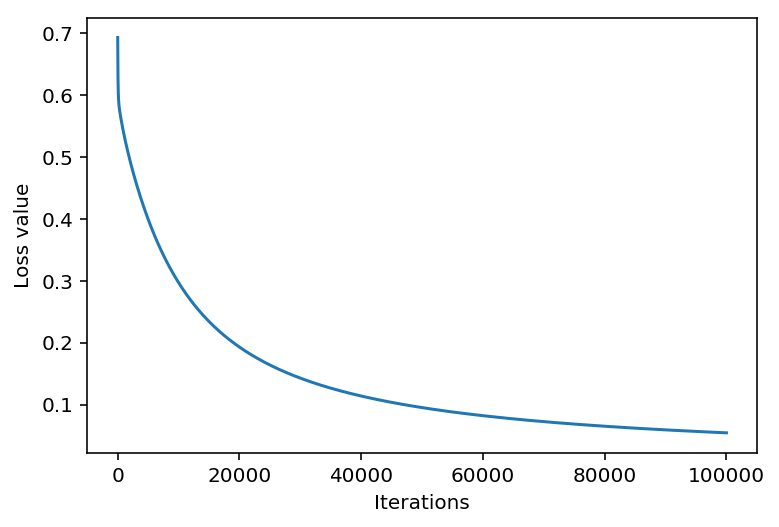

In [51]:
#construct the data matrix X
n = data.shape[0]
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = X[:,1]**2
X[:,4] = X[:,2]**2
X[:,5] = X[:,1]*X[:,2]
print(X)
y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
# w_init = np.array([-10,0.1,-0.2])[:,None]
w_init = np.array([0,0,0,0,0,0])[:,None]
tau = 5e-4; max_iter = 100000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


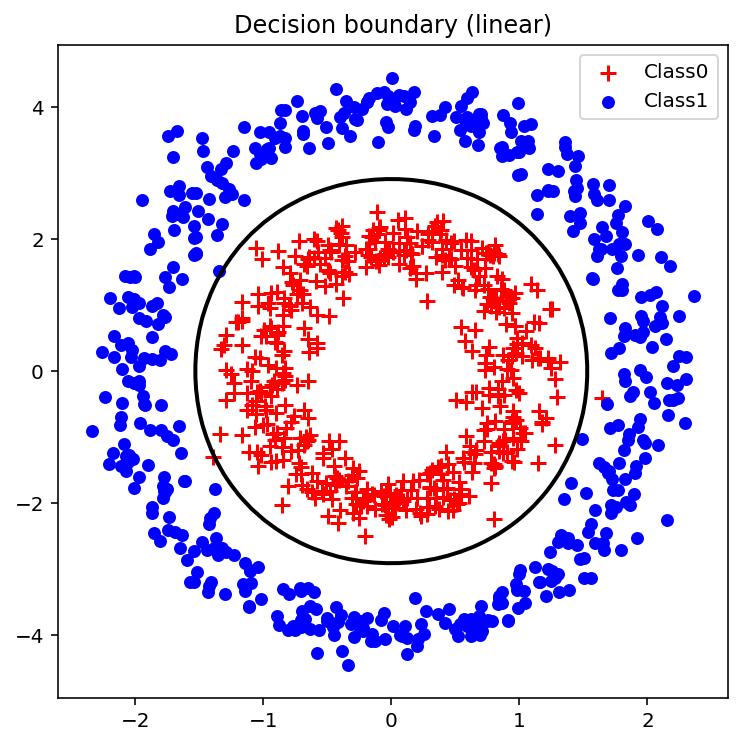

In [52]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = X2[:,1]**2
X2[:,4] = X2[:,2]**2
X2[:,5] = X2[:,1]**2 * X2[:,2]**2
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.1 Load dataset #2
<hr>
The data features for each data $i$ are $x_i=(x_{i(1)},x_{i(2)})$. <br>
The data label/target, $y_i$, indicates two classes with value 0 or 1.

Plot the data points.<br>
Hint: You may use matplotlib function `scatter(x,y)`.

No handles with labels found to put in legend.


Number of training data= 1000
[[ 0.7609  -0.03701  0.     ]
 [ 1.13638 -0.00651  0.     ]
 [ 1.0643  -0.06773  0.     ]
 [ 0.89776  0.09081  0.     ]
 [ 1.00726 -0.05074  0.     ]
 [ 1.01348  0.0948   0.     ]
 [ 0.9833   0.03865  0.     ]
 [ 1.06511  0.17717  0.     ]
 [ 1.08636  0.19087  0.     ]
 [ 0.87466  0.05625  0.     ]]
(1000, 3)
float64


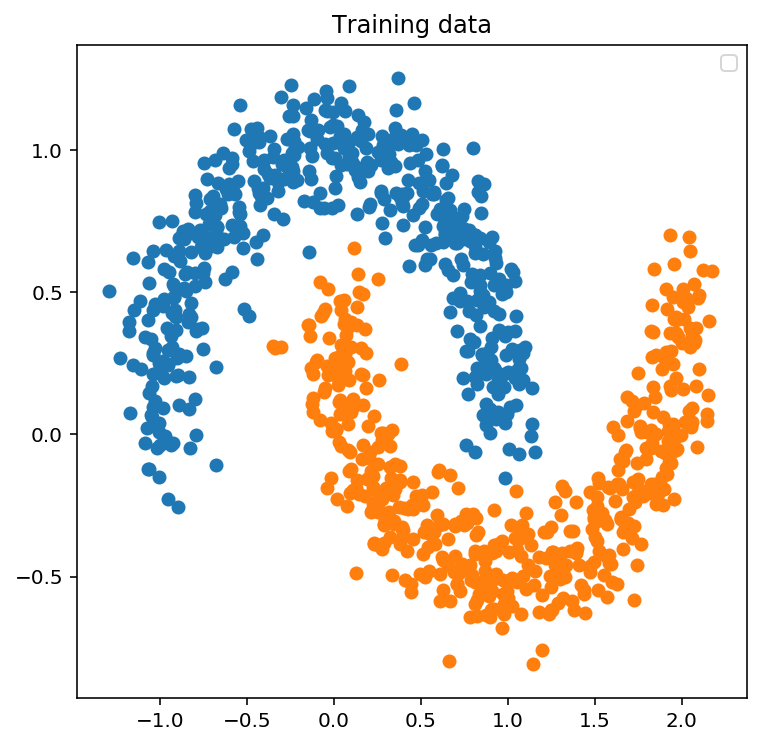

In [55]:
# import data with numpy
data = np.loadtxt('two_moons.txt', delimiter=',')

# number of training data
n = data.shape[0] 
print('Number of training data=',n)

# print
print(data[:10,:])
print(data.shape)
print(data.dtype)

# plot
x1 = data[:,0] # feature 1
x2 = data[:,1] # feature 2
idx_class0 = (data[:,2]==0) # index of class0
idx_class1 = (data[:,2]==1) # index of class1

plt.figure(1,figsize=(6,6))
plt.scatter(x1[idx_class0],x2[idx_class0])
plt.scatter(x1[idx_class1],x2[idx_class1])
plt.title('Training data')
plt.legend()
plt.show()

## 2.2 Linear logistic regression/classification task.
<hr>


Implement the linear logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

Time= 2.306875228881836
0.38419862345137407
[[-0.14914571]
 [ 1.00937383]
 [-1.27657213]]


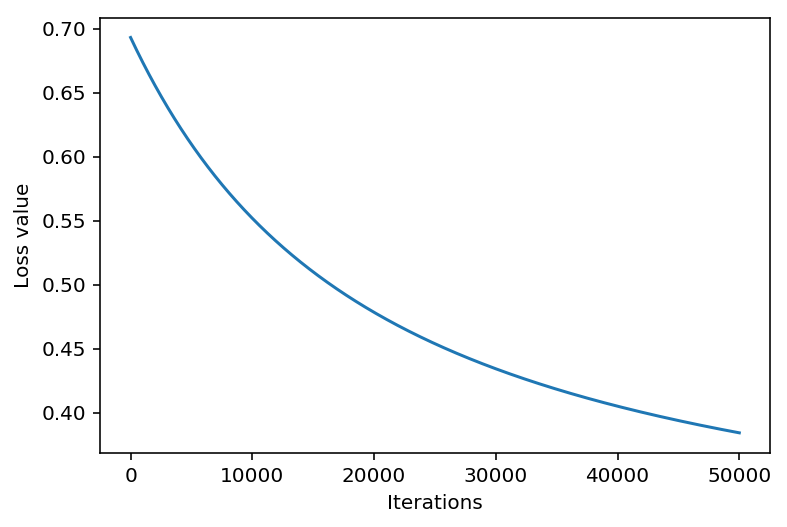

In [57]:
#YOUR CODE HERE#construct the data matrix X
n = data.shape[0]
X = np.ones([n,3]) 
X[:,1:3] = data[:,0:2]
y = data[:,2][:,None] # label 

# run gradient descent algorithm
start = time.time()
# w_init = np.array([-10,0.1,-0.2])[:,None]
w_init = np.array([0,0,0])[:,None]
tau = 1e-4; max_iter = 50000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)

# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

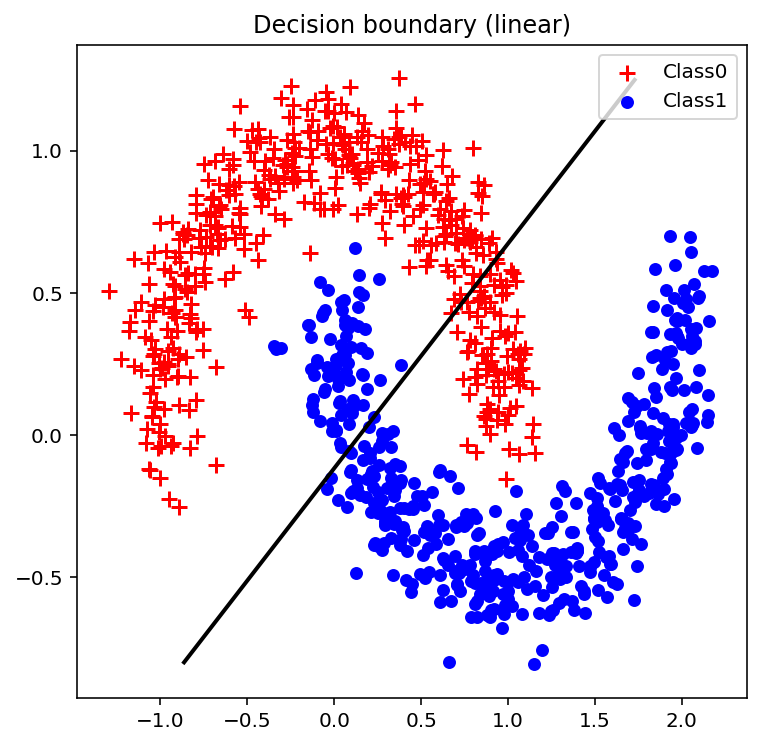

In [58]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.3 Quadratic logistic regression/classification task.
<hr>


Implement the quadratic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.255. <br>

[[ 1.00000000e+00  7.60900000e-01 -3.70100000e-02  5.78968810e-01
   1.36974010e-03 -2.81609090e-02]
 [ 1.00000000e+00  1.13638000e+00 -6.51000000e-03  1.29135950e+00
   4.23801000e-05 -7.39783380e-03]
 [ 1.00000000e+00  1.06430000e+00 -6.77300000e-02  1.13273449e+00
   4.58735290e-03 -7.20850390e-02]
 ...
 [ 1.00000000e+00  3.64300000e-02  4.68570000e-01  1.32714490e-03
   2.19557845e-01  1.70700051e-02]
 [ 1.00000000e+00  7.23000000e-03  2.67470000e-01  5.22729000e-05
   7.15402009e-02  1.93380810e-03]
 [ 1.00000000e+00 -3.40000000e-02  5.10570000e-01  1.15600000e-03
   2.60681725e-01 -1.73593800e-02]]
Time= 5.0644612312316895
0.2628350591081475
[[ 0.36401094]
 [ 1.4299357 ]
 [-3.29967481]
 [ 0.06556776]
 [-1.31587471]
 [-1.01799777]]


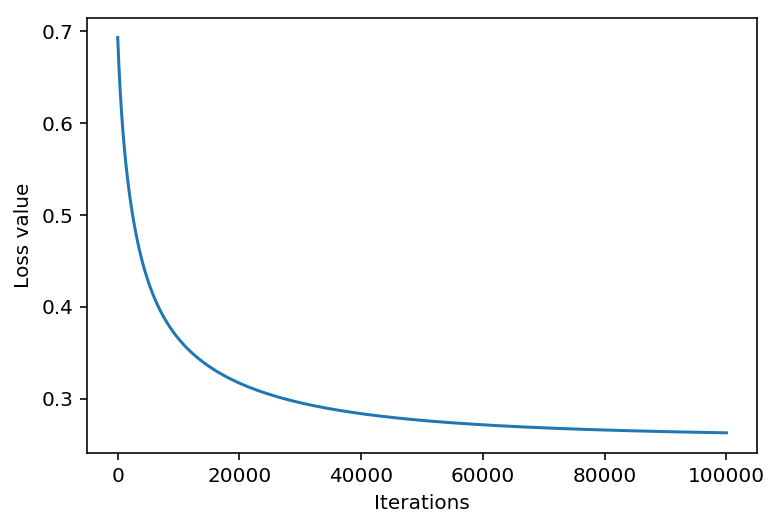

In [59]:
#construct the data matrix X
n = data.shape[0]
X = np.ones([n,6]) 
X[:,1:3] = data[:,0:2]
X[:,3] = X[:,1]**2
X[:,4] = X[:,2]**2
X[:,5] = X[:,1]*X[:,2]
print(X)
y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
# w_init = np.array([-10,0.1,-0.2])[:,None]
w_init = np.array([0,0,0,0,0,0])[:,None]
tau = 5e-4; max_iter = 100000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

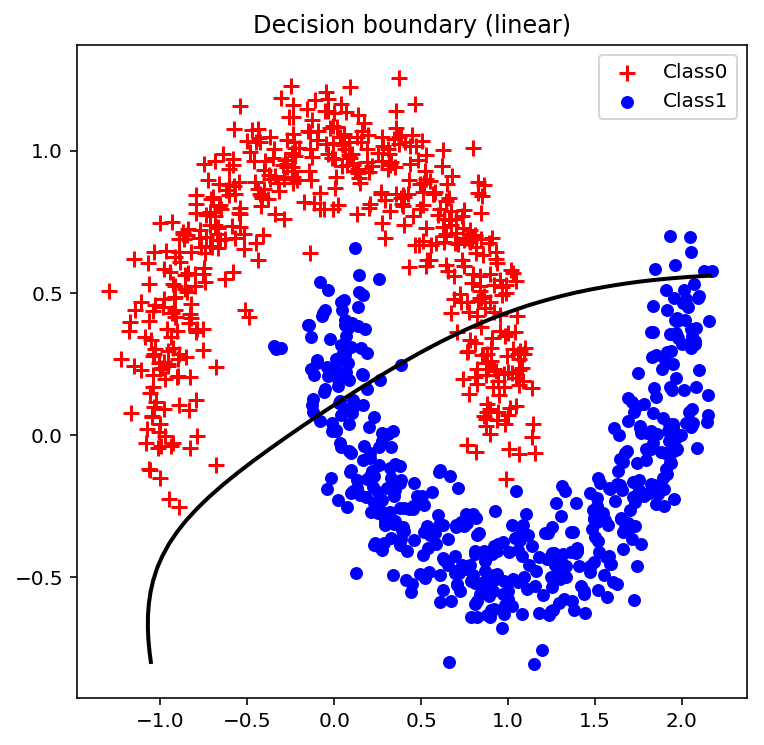

In [61]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),6]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = X2[:,1]**2
X2[:,4] = X2[:,2]**2
X2[:,5] = X2[:,1]**2 * X2[:,2]**2
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()


## 2.4 Cubic logistic regression/classification task.
<hr>

The logistic regression/classification predictive function is defined as:

$$
\begin{aligned}
p_w(x) &= \sigma(X w)
\end{aligned}
$$

In the case of **cubic** prediction, we have:

<br>
$$
X = 
\left[ 
\begin{array}{cccccccc}
1 & x_{1(1)} & x_{1(2)} & x_{1(1)}^2 & x_{1(2)}^2 & x_{1(1)}x_{1(2)} & x_{1(2)}^3 & x_{1(2)}^3 & x_{1(1)}^2x_{1(2)} & x_{1(1)}x_{1(2)}^2 \\ 
1 & x_{2(1)} & x_{2(2)} & x_{2(1)}^2 & x_{2(2)}^2 & x_{2(1)}x_{2(2)} & x_{2(2)}^3 & x_{2(2)}^3 & x_{2(1)}^2x_{2(2)} & x_{2(1)}x_{2(2)}^2\\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} & x_{n(1)}^2 & x_{n(2)}^2 & x_{n(1)}x_{n(2)} & x_{n(2)}^3 & x_{n(2)}^3 & x_{n(1)}^2x_{n(2)} & x_{n(1)}x_{n(2)}^2
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2\\ 
w_3\\ 
w_4\\ 
w_5\\ 
w_6\\ 
w_7\\ 
w_8\\ 
w_9
\end{array} 
\right]
\quad
$$

Implement the cubic logistic regression function with gradient descent or scikit-learn. Visualize the boundary decision.<br>

Check your code correctness: The loss value should be around 0.043. <br>

[[ 1.00000000e+00  7.60900000e-01 -3.70100000e-02 ... -5.06940811e-05
  -2.14276357e-02  1.04223524e-03]
 [ 1.00000000e+00  1.13638000e+00 -6.51000000e-03 ... -2.75894451e-07
  -8.40675037e-03  4.81598980e-05]
 [ 1.00000000e+00  1.06430000e+00 -6.77300000e-02 ... -3.10701412e-04
  -7.67201070e-02  4.88231969e-03]
 ...
 [ 1.00000000e+00  3.64300000e-02  4.68570000e-01 ...  1.02878219e-01
   6.21860286e-04  7.99849229e-03]
 [ 1.00000000e+00  7.23000000e-03  2.67470000e-01 ...  1.91348575e-02
   1.39814326e-05  5.17235653e-04]
 [ 1.00000000e+00 -3.40000000e-02  5.10570000e-01 ...  1.33096268e-01
   5.90218920e-04 -8.86317865e-03]]
Time= 85.07043766975403
0.04362444000151661
[[ 3.92929403]
 [-2.53006472]
 [-4.97655134]
 [-7.85848881]
 [-1.10937176]
 [-1.86344816]
 [ 5.81165108]
 [-3.04431951]
 [-1.8845738 ]
 [ 1.9428535 ]]


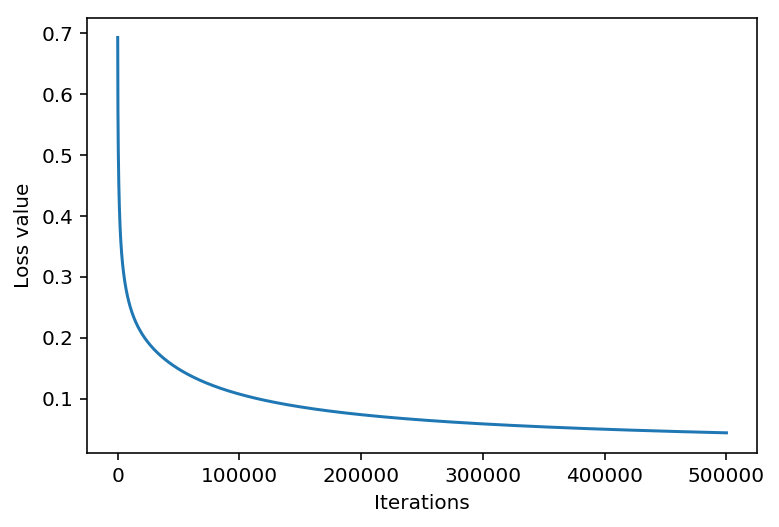

In [73]:
#YOUR CODE HERE#construct the data matrix X
n = data.shape[0]
X = np.ones([n,10]) 
X[:,1:3] = data[:,0:2]
X[:,3] = X[:,1]**2
X[:,4] = X[:,2]**2
X[:,5] = X[:,1]*X[:,2]
X[:,6] = X[:,1]**3
X[:,7] = X[:,2]**3
X[:,8] = X[:,3]*X[:,2]
X[:,9] = X[:,4]*X[:,1]

print(X)
y = data[:,2][:,None] # label 


# run gradient descent algorithm
start = time.time()
# w_init = np.array([-10,0.1,-0.2])[:,None]
w_init = np.array([0]*10)[:,None]
tau = 1e-3; max_iter = 500000
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print('Time=',time.time() - start)
print(L_iters[-1])
print(w)


# plot
plt.figure(3)
plt.plot(np.array(range(max_iter)), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()

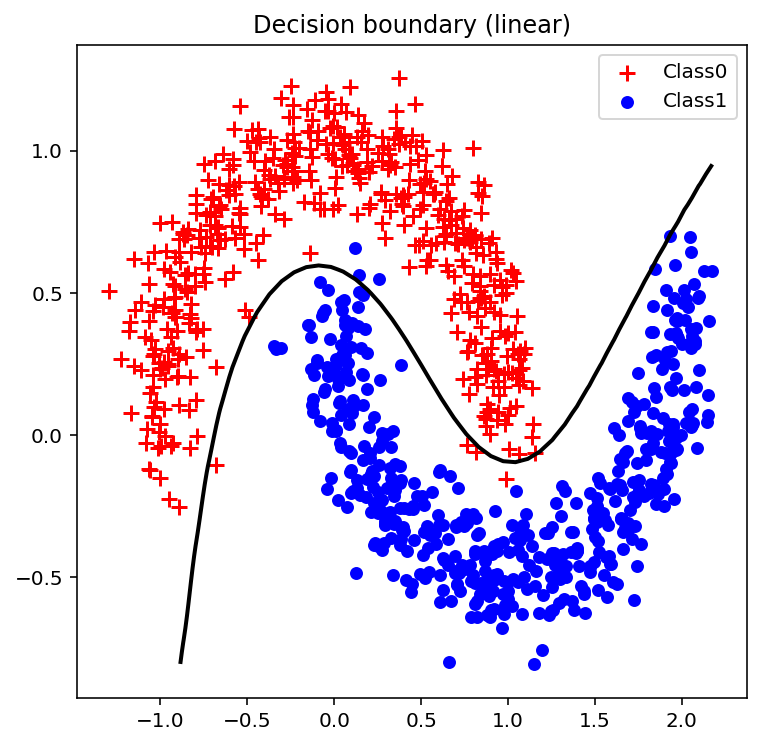

In [74]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),10]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
X2[:,3] = X2[:,1]**2
X2[:,4] = X2[:,2]**2
X2[:,5] = X2[:,1]**2 * X2[:,2]**2
X2[:,6] = X2[:,1]**3
X2[:,7] = X2[:,2]**3
X2[:,8] = X2[:,3]*X2[:,2]
X2[:,9] = X2[:,4]*X2[:,1]
p = f_pred(X2,w)
p = p.reshape(xx1.shape)


# plot
plt.figure(4,figsize=(6,6))
plt.scatter(x1[idx_class0], x2[idx_class0], s=60, c='r', marker='+', label='Class0') 
plt.scatter(x1[idx_class1], x2[idx_class1], s=30, c='b', marker='o', label='Class1')
plt.contour(xx1, xx2, p, [0.5], linewidths=2, colors='k') 
plt.legend()
plt.title('Decision boundary (linear)')
plt.show()
